In [2]:
import pandas as pd
import numpy as np
import scipy.stats
from sklearn import linear_model

import matplotlib.pyplot as plt
import seaborn as sns

# 3.2 Types of Data in Statistics

## 3.2.1 Categorical Data

In [3]:
weather_df = pd.DataFrame({
    'temp': [55, 34, 80, 75, 53],
    'weather': ['windy', 'cloudy', 'sunny', 'rain', 'sunny']
})

weather_df

,temp,weather
0,55,windy
1,34,cloudy
2,80,sunny
3,75,rain
4,53,sunny


In [4]:
weather_df['weather_encoded'] = weather_df['weather'].map({'windy': 0, 'cloudy': 1, 'sunny': 2, 'rain': 3})
weather_df

,temp,weather,weather_encoded
0,55,windy,0
1,34,cloudy,1
2,80,sunny,2
3,75,rain,3
4,53,sunny,2


In [5]:
pd.get_dummies(weather_df['weather'])

,cloudy,rain,sunny,windy
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


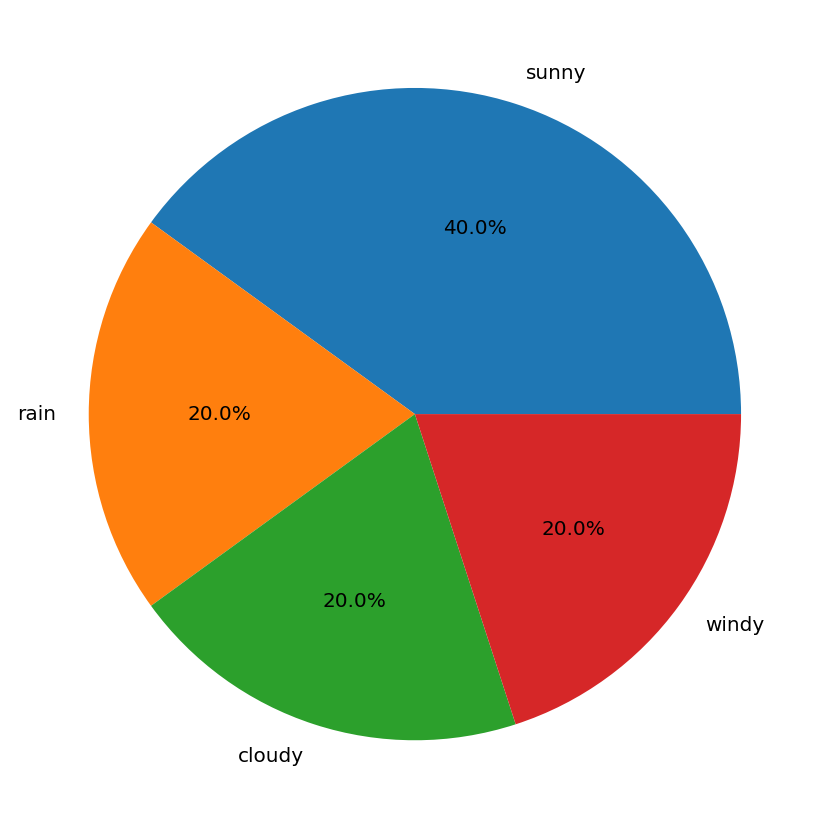

In [6]:
weather_df['weather'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [7]:
student_df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Carol', 'Dan', 'Eli', 'Fran'],
    'sex': ['female', 'male', 'female', 'male', 'male', 'female'],
    'class': ['FY', 'SO', 'SR', 'SO', 'JR', 'SR'],
    'gpa': [90, 93, 97, 89, 95, 92],
    'num_classes': [4, 3, 4, 4, 3, 2]
})
student_df

,name,sex,class,gpa,num_classes
0,Alice,female,FY,90,4
1,Bob,male,SO,93,3
2,Carol,female,SR,97,4
3,Dan,male,SO,89,4
4,Eli,male,JR,95,3
5,Fran,female,SR,92,2


In [9]:
student_df['female_flag'] = student_df['sex'] == 'female'
student_df = student_df.drop('sex', axis=1)
student_df

,name,class,gpa,num_classes,female_flag
0,Alice,FY,90,4,True
1,Bob,SO,93,3,False
2,Carol,SR,97,4,True
3,Dan,SO,89,4,False
4,Eli,JR,95,3,False
5,Fran,SR,92,2,True


## 3.2.2 Numerical Data

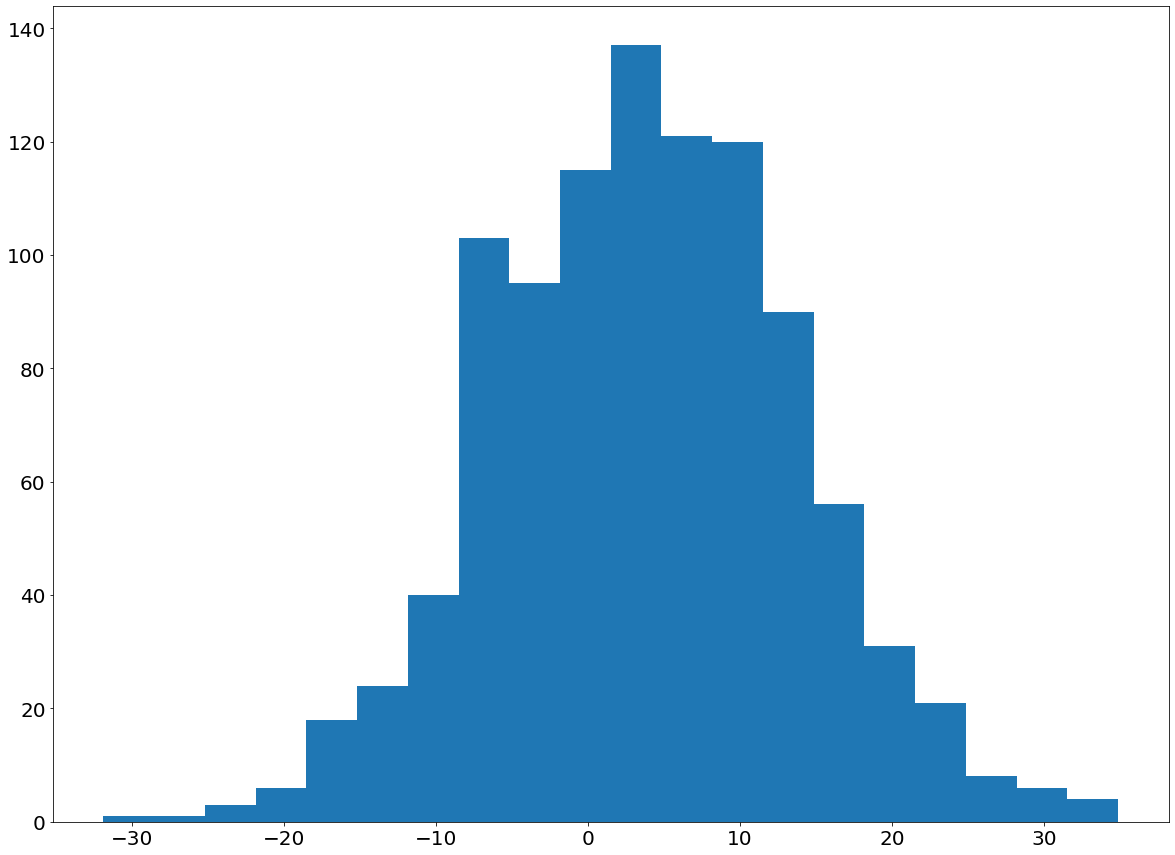

In [11]:
samples = np.random.normal(4, 10, size=1000)

plt.hist(samples, bins=20)
plt.show()

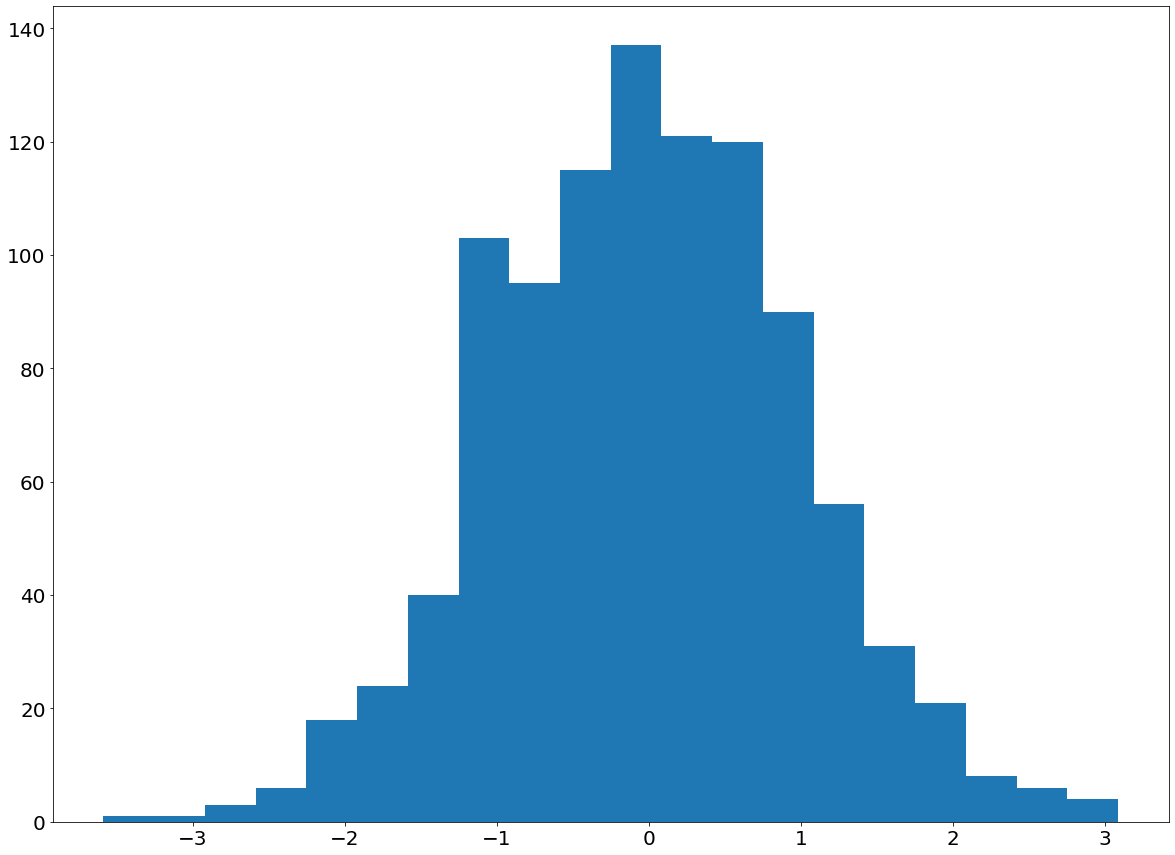

In [12]:
normalized_samples = (samples - 4) / 10

plt.hist(normalized_samples, bins=20)
plt.show()

In [13]:
sample_mean = np.mean(samples)
sample_sd = np.std(samples)

sample_mean, sample_sd

(3.775724553212789, 9.87450069513982)

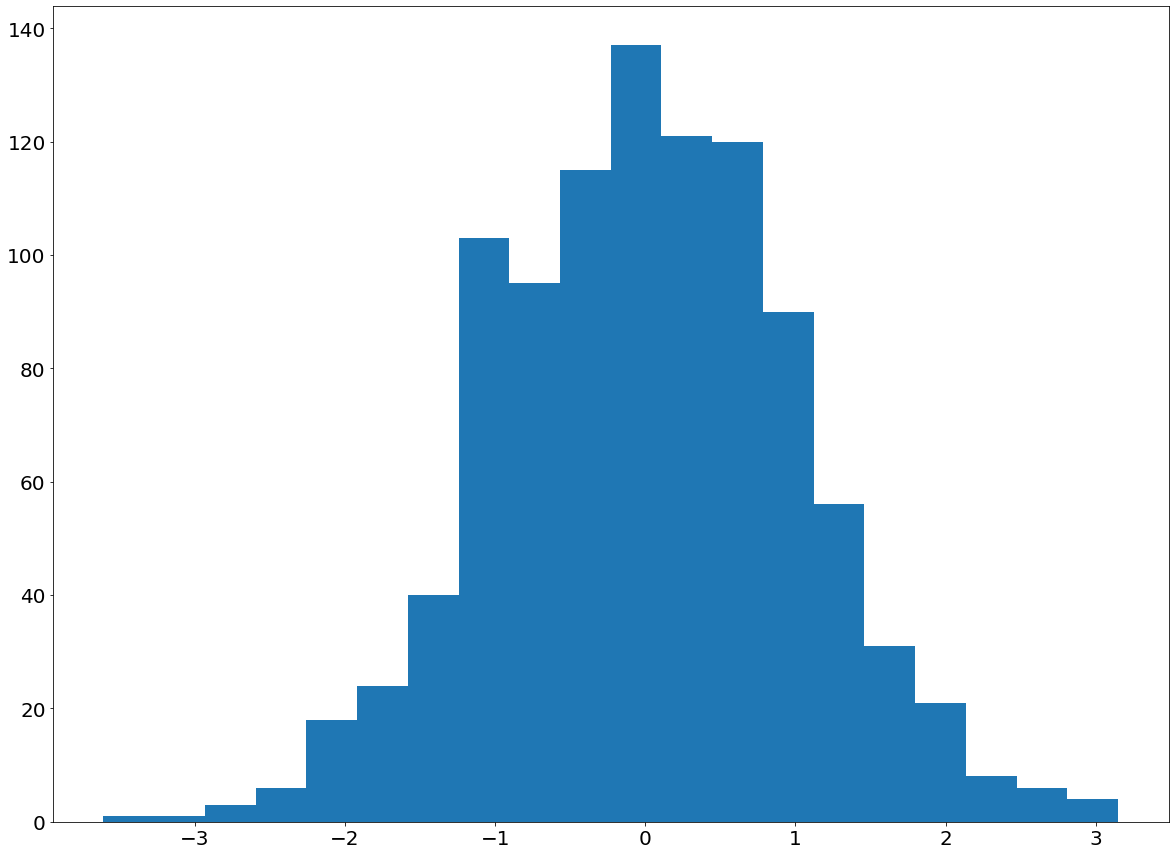

In [14]:
normalized_samples = (samples - sample_mean) / sample_sd

plt.hist(normalized_samples, bins=20)
plt.show()

# 3.3 Descriptive Statistics

## Python-Related Descriptive Statistics

In [15]:
df = pd.DataFrame({
    'numerical': np.random.normal(size=5),
    'categorical': ['a', 'b', 'a', 'c', 'b'],
    'ordinal': [1, 2, 3, 5, 4]
})

df

,numerical,categorical,ordinal
0,-0.111691,a,1
1,1.209548,b,2
2,0.019181,a,3
3,-0.125899,c,5
4,-1.562629,b,4


In [16]:
df.describe()

,numerical,ordinal
count,5.000000,5.000000
mean,-0.114298,3.000000
std,0.983385,1.581139
min,-1.562629,1.000000
25%,-0.125899,2.000000
50%,-0.111691,3.000000
75%,0.019181,4.000000
max,1.209548,5.000000


In [17]:
df.describe(include='all')

,numerical,categorical,ordinal
count,5.000000,5,5.000000
unique,NaN,3,NaN
top,NaN,a,NaN
freq,NaN,2,NaN
mean,-0.114298,NaN,3.000000
std,0.983385,NaN,1.581139
min,-1.562629,NaN,1.000000
25%,-0.125899,NaN,2.000000
50%,-0.111691,NaN,3.000000
75%,0.019181,NaN,4.000000


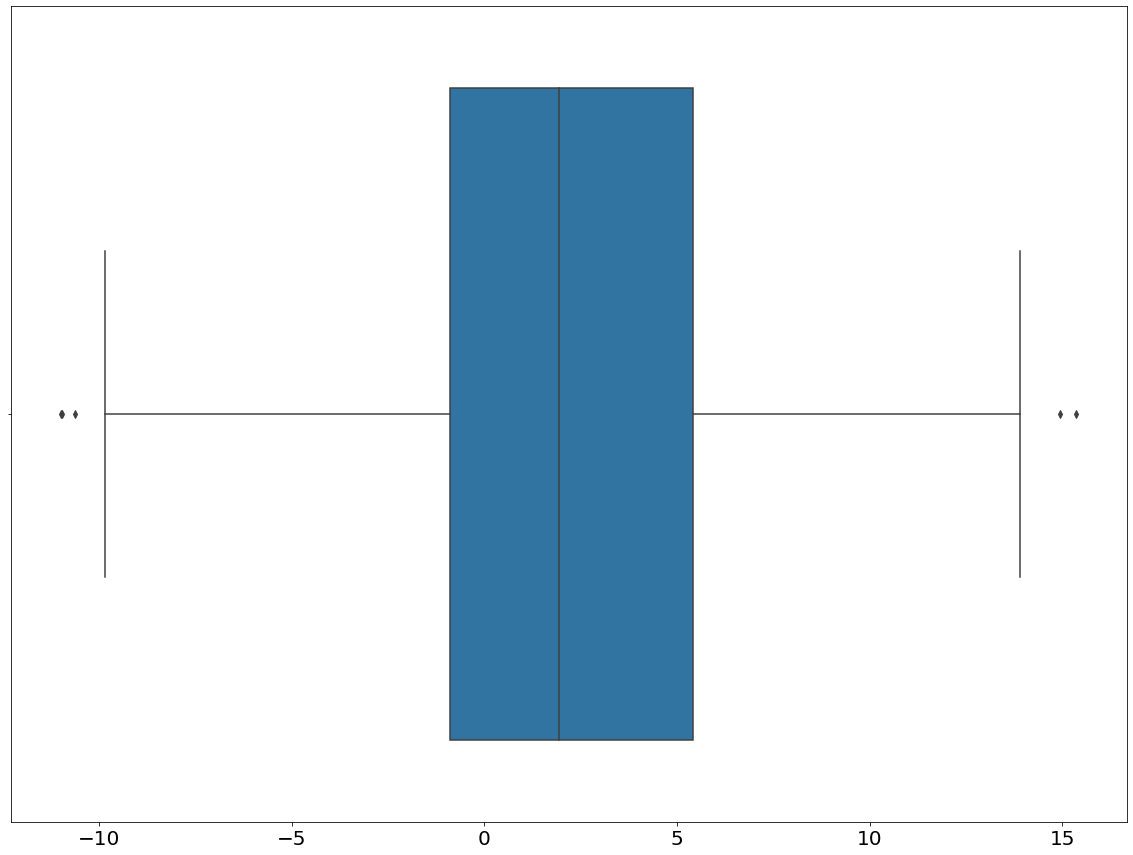

In [18]:
sns.boxplot(np.random.normal(2, 5, size=1000))
plt.show()

In [19]:
df = pd.DataFrame({
    'numerical': np.random.normal(size=1000),
    'categorical': np.random.choice(['a', 'b', 'c'], size=1000),
    'ordinal': np.random.choice([1, 2, 3, 4, 5], size=1000)
})

df.head()

,numerical,categorical,ordinal
0,2.030559,c,5
1,0.036235,c,5
2,-0.453510,b,1
3,-2.169020,c,2
4,1.384212,c,2


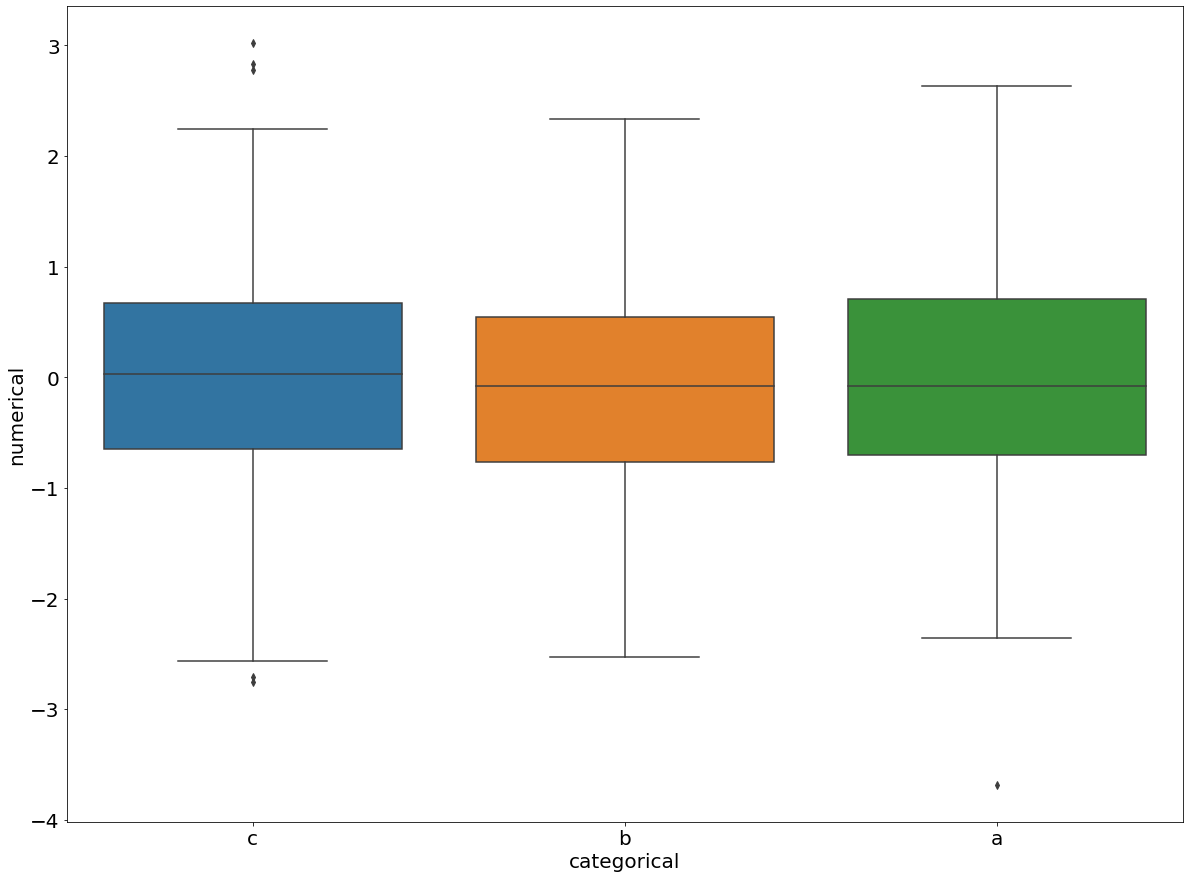

In [20]:
sns.boxplot(y='numerical', x='categorical', data=df)
plt.show()

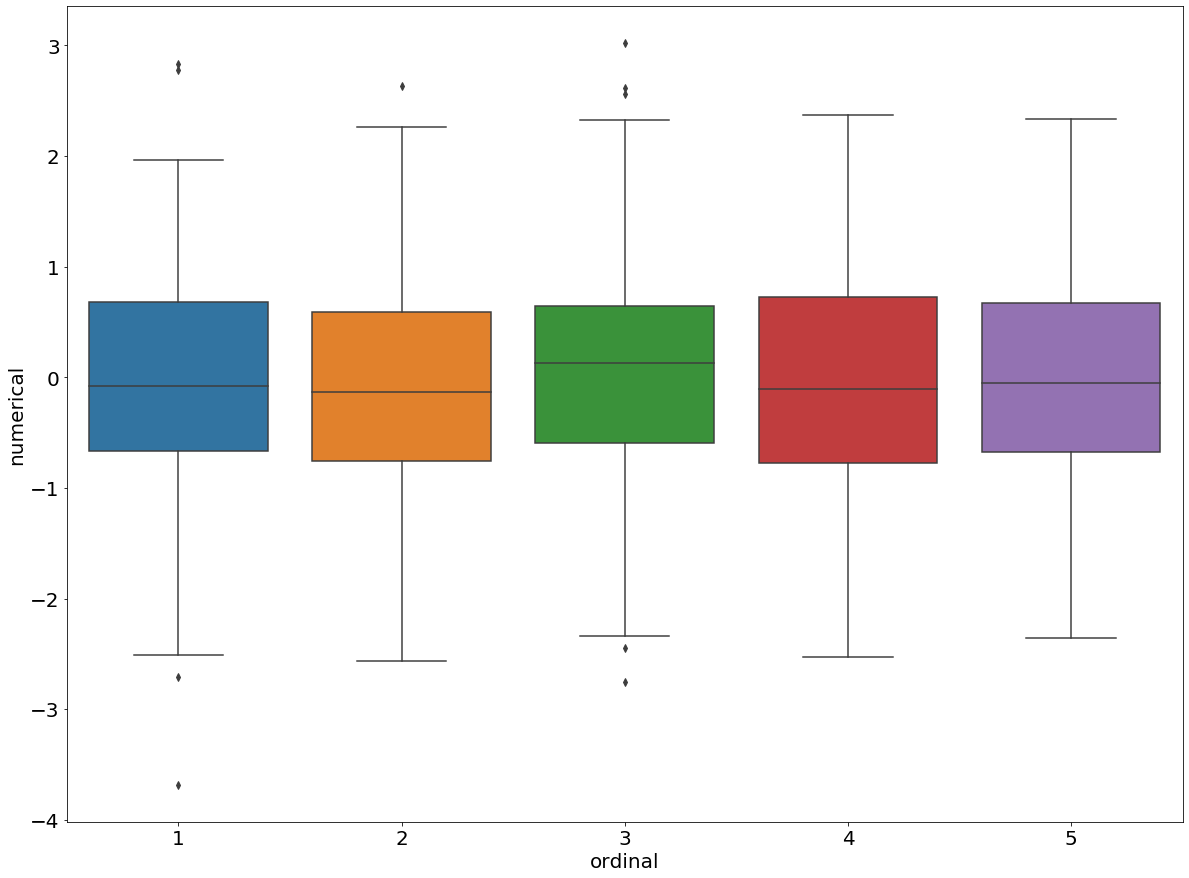

In [21]:
sns.boxplot(y='numerical', x='ordinal', data=df)
plt.show()

# 3.4 Inferential Statistics

## 3.4.1 T-Tests

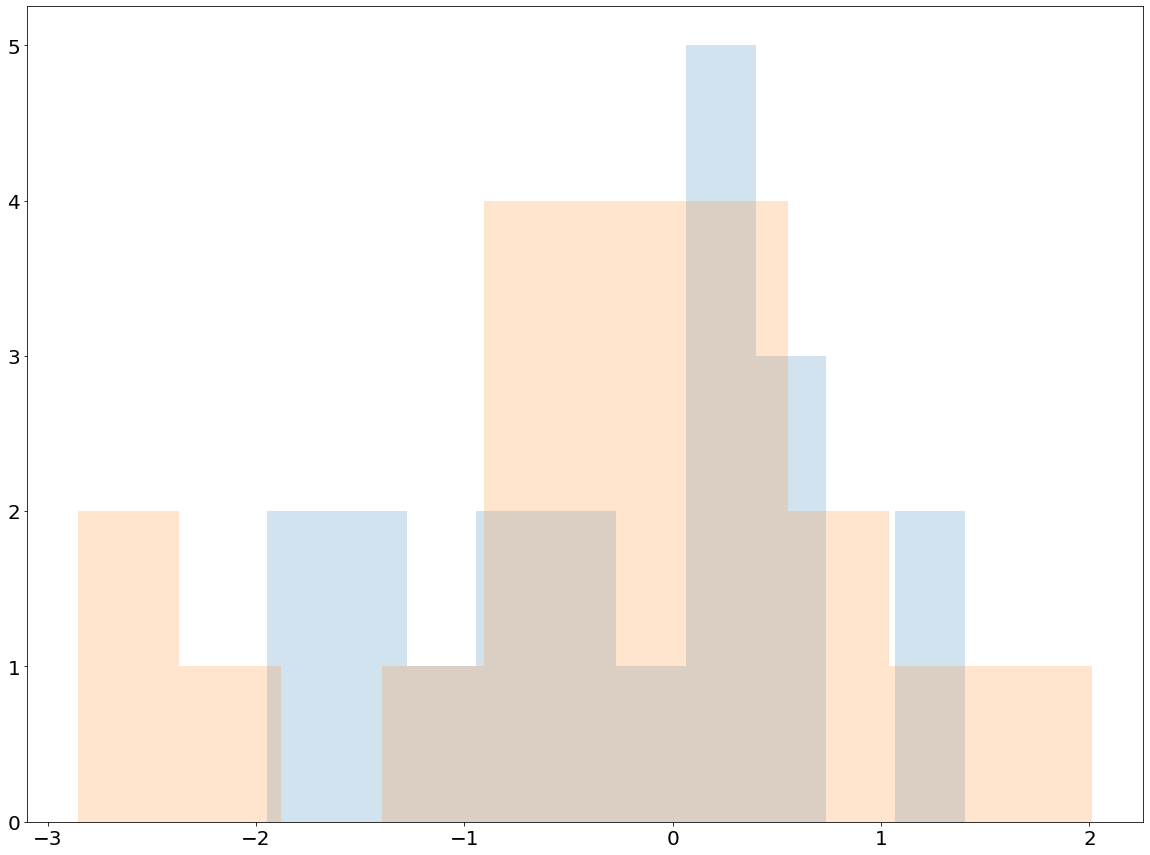

In [24]:
samples_a = np.random.normal(size=20)
samples_b = np.random.normal(0.2, 1, size=20)

plt.hist(samples_a, alpha=0.2)
plt.hist(samples_b, alpha=0.2)
plt.show()

In [25]:
scipy.stats.ttest_ind(samples_a, samples_b).pvalue

0.8616483548091348

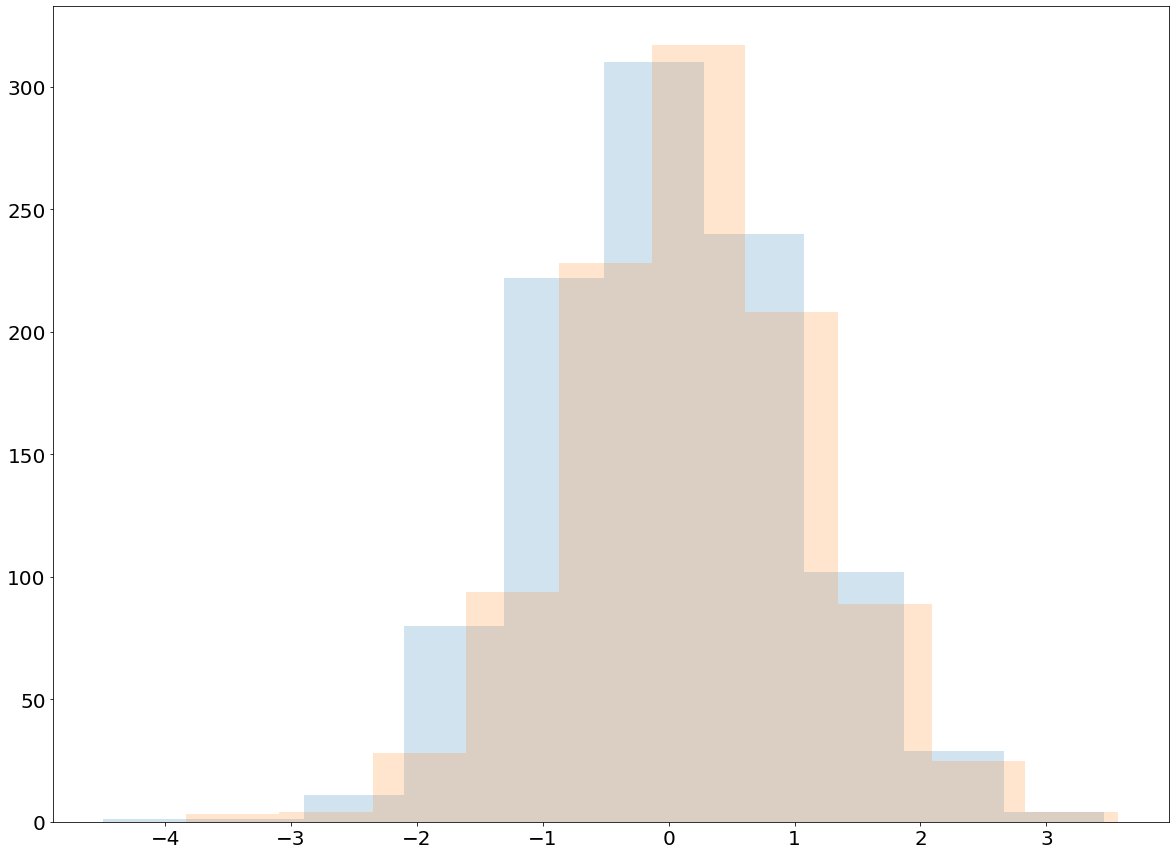

In [26]:
samples_a = np.random.normal(size=1000)
samples_b = np.random.normal(0.2, 1, size=1000)

plt.hist(samples_a, alpha=0.2)
plt.hist(samples_b, alpha=0.2)
plt.show()

In [27]:
scipy.stats.ttest_ind(samples_a, samples_b).pvalue

3.1445050317071093e-06

## 3.4.2 Correlation Matrix

In [28]:
x = np.random.rand(500,)
y = x * 2 + np.random.normal(0, 0.3, 500)
z = np.random.rand(500,)

df = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z
})

df.head()

,x,y,z
0,0.117481,0.325332,0.550776
1,0.760875,1.285527,0.323788
2,0.919157,1.937977,0.597903
3,0.399931,0.399549,0.504054
4,0.371473,0.618477,0.819181


In [29]:
df.corr()

,x,y,z
x,1.000000,0.897084,0.007261
y,0.897084,1.000000,-0.009610
z,0.007261,-0.009610,1.000000


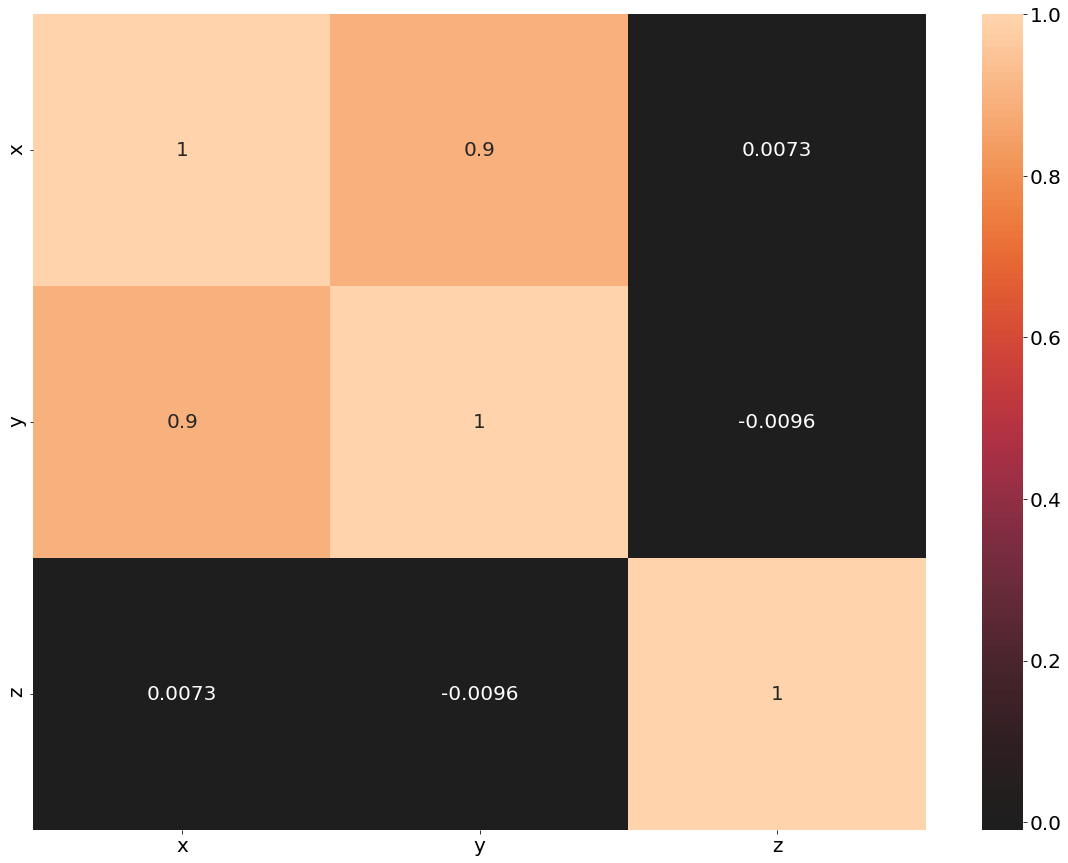

In [30]:
sns.heatmap(df.corr(), center=0, annot=True)
bottom, top = plt.ylim()
plt.ylim(bottom + 0.5, top - 0.5)

plt.show()

## 3.4.3 Statistical and Machine Learning Models

In [8]:
model = linear_model.LinearRegression()
model.fit(df[['x', 'z']], df['y'])
model.coef_

array([1.98861194, 0.05436268])

In [11]:
model.predict([[1, 2], [2, 3]])

array([2.10790143, 4.15087605])